<a href="https://colab.research.google.com/github/SimpleVlad/FirstAutoEncoder/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

In [0]:


def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [0]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 49)                38465     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoencoder.fit(x_train, x_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 26us/step - loss: 0.0780 - val_loss: 0.0775


In [0]:


def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [19]:
n = 15

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

array([ 7.231341 ,  4.652102 ,  4.154476 ,  3.3346338,  7.3333426,
        2.0980048,  5.306056 ,  7.0654054,  9.833226 ,  5.305809 ,
        3.8929207,  5.0193324,  6.5155544,  5.2280054, 10.445564 ,
        5.8709397,  2.0614083,  4.3540277,  6.770244 ,  4.1807203,
        2.8070142,  3.0909157,  2.5289917,  1.7448066,  4.975152 ,
        5.512226 ,  3.7058773,  6.09849  ,  9.942067 ,  2.4672186,
        3.3694406,  7.5001554,  3.0729167,  6.7294264,  7.778542 ,
        4.8618903,  5.45518  ,  6.48953  ,  7.5610924,  1.9003637,
        5.990622 ,  3.848784 ,  2.8578348,  5.885862 ,  7.2666664,
        7.5111065,  4.59489  ,  3.836509 ,  4.6974535], dtype=float32)

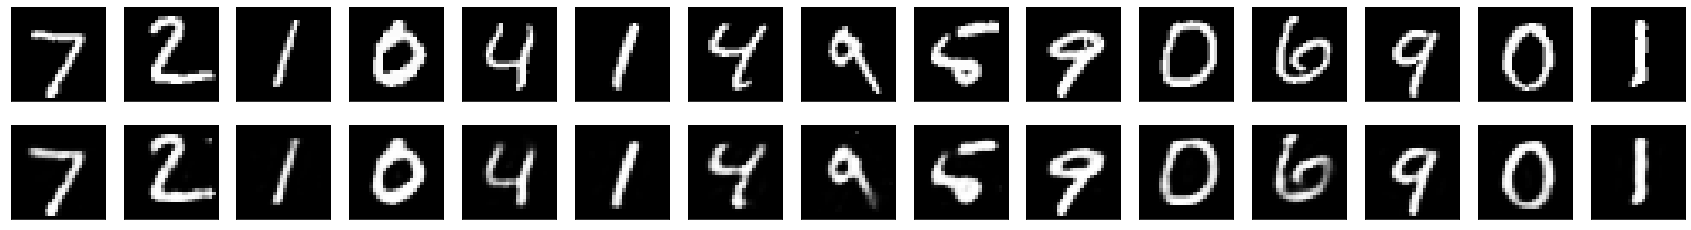

In [20]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)